In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
from netCDF4 import num2date
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as basemap
import getpass

# Humbolt

## Leer datos crudos

## Datos ARGO

**Metodos para el calculo de MLD**

Dos metodos se tuvieron en cuenta:

1. Holte, J., and L. Talley (2009), A new algorithm for finding mixed layer depths with applications to argo data and Subantarctic Mode Water formation, J. Atmos. Oceanic Technol., 26, 1920–1939, doi:10.1175/2009JTECHO543.1.

2. de Boyer Montégut, C, G. Madec, A. S. Fischer, A. Lazar, and D. Iudicone (2004), Mixed layer depth over the global ocean: An examination of profile data and a profile-based climatology, J. Geophys. Res., 109, C12003, doi:10.1029/2004JC002378. [Climatology obtained at http://www.lodyc.jussieu.fr/cdblod/mld.html]


Tambien se siguio el metodo propuesto por: 

3. Holte, J., L. D. Talley, J. Gilson, and D. Roemmich (2017), An Argo mixed layer climatology and database, Geophys. Res. Lett., 44, 5618–5626, doi:10.1002/2017GL073426.

El algoritmo funciona modelando la forma general de cada perfil ajustando líneas a la termoclina estacional y la capa mixta. Calcula un conjunto de posibles MLD: umbral MLD, gradiente MLD, intersección de termoclina estacional y ajustes de capas mixtas, máximos y mínimos de propiedad. Luego analiza los patrones en la suite para seleccionar una estimación final de MLD

Siguiendo a Boyer Montégut et al. [2004], tanto el umbral como el algoritmo se inician a 10 m de profundidad; de Boyer Montégut et al. [2004] utilizan esta profundidad inicial específicamente para evitar capas mixtas diurnas, ya que su climatología está diseñada para analizar escalas de variabilidad mensuales y mayores. En consecuencia,  no se capturan capas mixtas extremadamente poco profundas (o inexistentes) en regiones como el Océano Pacífico tropical oriental.




http://mixedlayer.ucsd.edu/

In [4]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/'
argo=xr.open_dataset('Argo_mixedlayers_monthlyclim_04142022.nc')
min_lon = -85;min_lat = -45
max_lon = -70;max_lat =-15
mask_lon = (argo.lon >= min_lon) & (argo.lon <= max_lon)
mask_lat = (argo.lat >= min_lat) & (argo.lat <= max_lat)
argo=argo.where(mask_lon & mask_lat, drop=True)
argo

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual


<xarray.Dataset>
Dimensions:        (iLAT: 30, iLON: 15, iMONTH: 12)
Dimensions without coordinates: iLAT, iLON, iMONTH
Data variables: (12/20)
    lat            (iLAT, iLON) float64 -44.5 -44.5 -44.5 ... -15.5 -15.5 -15.5
    lon            (iLON, iLAT) float64 -84.5 -84.5 -84.5 ... -70.5 -70.5 -70.5
    month          (iMONTH, iLON, iLAT) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
    mld_da_mean    (iLAT, iLON, iMONTH) float64 33.6 39.89 61.03 ... nan nan nan
    mld_dt_mean    (iLAT, iLON, iMONTH) float64 34.27 40.39 61.36 ... nan nan
    mld_da_median  (iLAT, iLON, iMONTH) float64 35.5 42.95 64.07 ... nan nan nan
    ...             ...
    mlt_dt         (iLAT, iLON, iMONTH) float64 12.55 13.6 14.1 ... nan nan nan
    mls_da         (iLAT, iLON, iMONTH) float64 34.09 34.1 34.11 ... nan nan nan
    mls_dt         (iLAT, iLON, iMONTH) float64 34.09 34.1 34.11 ... nan nan nan
    num            (iLAT, iLON, iMONTH) float64 8.0 6.0 3.0 8.0 ... 0.0 0.0 0.0
    longrid        (iLAT, iLON) float64 -84.5 -83.5 -82.5 ... -72.5 -71.5 -70.5
    latgrid        (iLAT, iLON) float64 -44.5 -44.5 -44.5 ... -15.5 -15.5 -15.5
Attributes:
    description:  This file was created using \n matlab R2011b with NETCDF Li...
    date:         [730848.53015047 730848.88790506 730849.28543982 ... 738591...

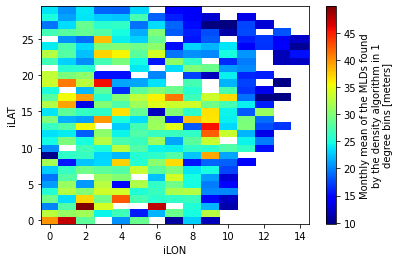

In [ ]:
argo['mld_da_mean'].sel(iMONTH=1).plot(cmap='jet')

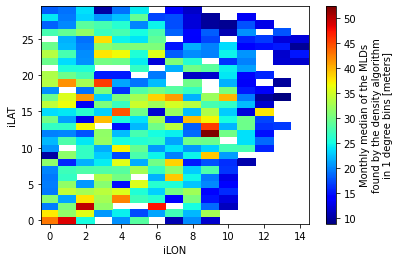

In [5]:
argo['mld_da_median'].sel(iMONTH=1).plot(cmap='jet')

In [6]:
x=np.unique(argo.lon.values)
y=np.unique(argo.lat.values)
y

array([-44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5])

## Leer datos Producto reanalisis (2005-2017)

In [7]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/Humboldt/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_PHY_MLD.nc')
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/Humboldt


<xarray.Dataset>
Dimensions:    (longitude: 61, latitude: 121, month: 12)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -70.5 -70.25 -70.0
  * latitude   (latitude) float32 -45.0 -44.75 -44.5 ... -15.5 -15.25 -15.0
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    MLD        (month, latitude, longitude) float32 ...

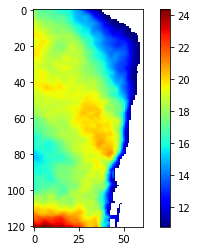

In [8]:
plt.imshow(np.flipud(reanal.sel(month=1).MLD.values), cmap='jet')
plt.colorbar()

## Validacion meses

In [15]:
X_t, Y_t= np.meshgrid(x,y)
lista_modelos=[]
lista_argos=[]
for i, j in zip(range(1,12+1,1),range(0,12,1)):
  grid_z0_1=basemap.interp(datain=np.flipud(reanal.sel(month=i).MLD.values), xin=reanal.sel(month=i).longitude.values, 
                         yin=reanal.sel(month=i).latitude.values, xout=X_t, yout=Y_t, order=1, masked= True)
  lista_modelos.append(grid_z0_1)
  argos=np.flipud(argo['mld_da_median'].sel(iMONTH=j).values)
  lista_argos.append(argos)
print(len(lista_modelos))
print(lista_modelos[0].shape)
print(len(lista_argos))
print(lista_argos[0].shape)

12
(30, 15)
12
(30, 15)


## Grafico de comparacion espacial

In [17]:
!pip install cmocean
import cmocean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


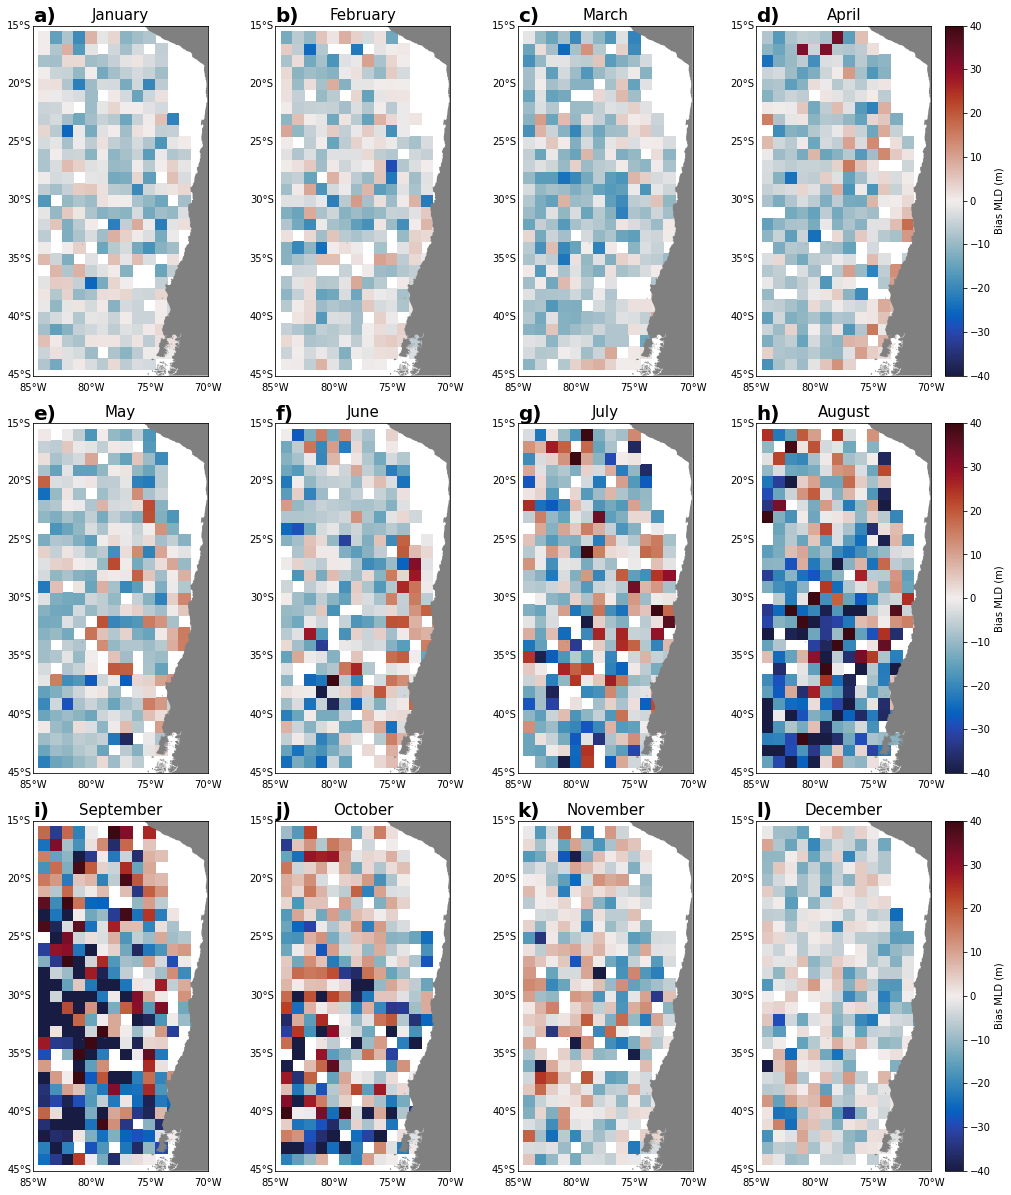

In [19]:
import string
x1= x
y1= list(y);y1=y1[::-1];y1= np.array(y1)
ticks= np.array([-50,-40,-30,-20,-10,0,10,20,30,40,50]) #labels para el colorbar
bias=10
MODELOS=lista_modelos
ARGO=lista_argos
w=0.23;h=0.22
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.65,w,h],[0.2,0.65,w,h],[0.4,0.65,w,h],[0.6,0.65,w,h],
        [0,0.4,w,h],[0.2,0.4,w,h],[0.4,0.4,w,h],[0.6,0.4,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-85,llcrnrlat=-45,urcrnrlon=-70,urcrnrlat=-15, resolution ='h')
  x, y = m(x1, y1)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y1, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-40, vmax=40)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-45,-14,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-85,-80,-75,-70],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias MLD (m)', rotation=90)

## Diagrama de Taylor

In [21]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=lista_modelos
ARGO=lista_argos
w=0.23;h=0.22
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [22]:
CORRCOEF[0]=CORRCOEF[0]+0.23;STD_m[0]=STD_m[0]+0.23
CORRCOEF[1]=CORRCOEF[1]+0.13;STD_m[1]=STD_m[1]+0.15
CORRCOEF[11]=CORRCOEF[11]+0.27;STD_m[11]=STD_m[11]+0.11
RMSE[9]=RMSE[9]-0.2;RMSE[10]=RMSE[10]-0.2

In [23]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

,STD,CORR,RMSE,Mes
0,0.585004,0.715833,1.072959,January
1,0.576609,0.712799,0.940107,February
2,0.555601,0.754492,0.890896,March
3,0.646789,0.790642,0.695186,April
4,0.729700,0.806806,0.668438,May
5,0.696465,0.820664,0.612701,June
6,0.727972,0.755814,0.668076,July
7,0.686354,0.716787,0.775663,August
8,0.522002,0.643636,0.831654,September
9,0.459678,0.479498,0.706920,October


In [24]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


Text(1.0, 0.21, 'RMSE')

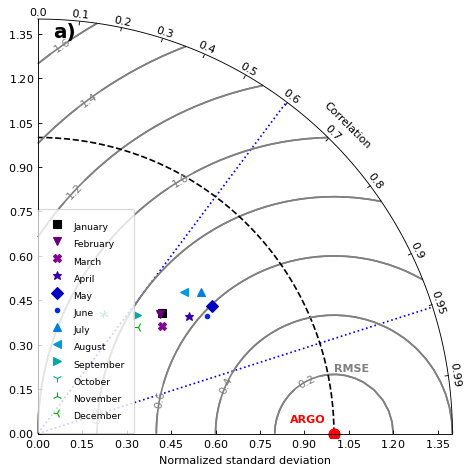

In [32]:
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.4), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=8)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.52**2)],[0,1.52], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.58**2)],[0,0.58], color='blue',linestyle=':') # correlacion 0.95
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.34,'a)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')

# California

## Leer datos crudos

## Datos ARGO

http://mixedlayer.ucsd.edu/

In [34]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/'
argo=xr.open_dataset('Argo_mixedlayers_monthlyclim_04142022.nc')
min_lon = -130;min_lat =20
max_lon = -110;max_lat =50
mask_lon = (argo.lon >= min_lon) & (argo.lon <= max_lon)
mask_lat = (argo.lat >= min_lat) & (argo.lat <= max_lat)
argo=argo.where(mask_lon & mask_lat, drop=True)
argo

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual


<xarray.Dataset>
Dimensions:        (iLAT: 30, iLON: 20, iMONTH: 12)
Dimensions without coordinates: iLAT, iLON, iMONTH
Data variables: (12/20)
    lat            (iLAT, iLON) float64 20.5 20.5 20.5 20.5 ... 49.5 49.5 49.5
    lon            (iLON, iLAT) float64 -129.5 -129.5 -129.5 ... -110.5 -110.5
    month          (iMONTH, iLON, iLAT) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
    mld_da_mean    (iLAT, iLON, iMONTH) float64 87.5 61.83 34.22 ... nan nan nan
    mld_dt_mean    (iLAT, iLON, iMONTH) float64 88.43 71.49 38.83 ... nan nan
    mld_da_median  (iLAT, iLON, iMONTH) float64 90.57 69.06 20.64 ... nan nan
    ...             ...
    mlt_dt         (iLAT, iLON, iMONTH) float64 21.47 21.22 21.47 ... nan nan
    mls_da         (iLAT, iLON, iMONTH) float64 34.92 34.95 34.73 ... nan nan
    mls_dt         (iLAT, iLON, iMONTH) float64 34.92 34.96 34.75 ... nan nan
    num            (iLAT, iLON, iMONTH) float64 10.0 9.0 14.0 ... 0.0 0.0 0.0
    longrid        (iLAT, iLON) float64 -129.5 -128.5 -127.5 ... -111.5 -110.5
    latgrid        (iLAT, iLON) float64 20.5 20.5 20.5 20.5 ... 49.5 49.5 49.5
Attributes:
    description:  This file was created using \n matlab R2011b with NETCDF Li...
    date:         [730848.53015047 730848.88790506 730849.28543982 ... 738591...

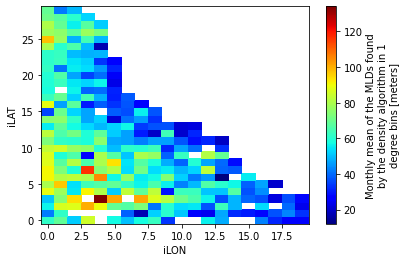

In [35]:
argo['mld_da_mean'].sel(iMONTH=1).plot(cmap='jet')

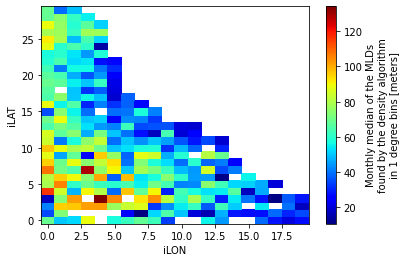

In [36]:
argo['mld_da_median'].sel(iMONTH=1).plot(cmap='jet')

In [37]:
x=np.unique(argo.lon.values)
y=np.unique(argo.lat.values)
y

array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
       31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5,
       42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5])

## Leer datos Producto reanalisis (2005-2017)

In [38]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/California/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_PHY_MLD.nc')
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/California


<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 121, month: 12)
Coordinates:
  * longitude  (longitude) float32 -130.0 -129.8 -129.5 ... -110.5 -110.2 -110.0
  * latitude   (latitude) float32 20.0 20.25 20.5 20.75 ... 49.5 49.75 50.0
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    MLD        (month, latitude, longitude) float32 ...

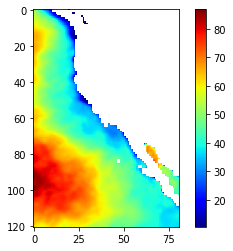

In [39]:
plt.imshow(np.flipud(reanal.sel(month=1).MLD.values), cmap='jet')
plt.colorbar()

## Validacion meses

In [40]:
X_t, Y_t= np.meshgrid(x,y)
lista_modelos=[]
lista_argos=[]
for i, j in zip(range(1,12+1,1),range(0,12,1)):
  grid_z0_1=basemap.interp(datain=np.flipud(reanal.sel(month=i).MLD.values), xin=reanal.sel(month=i).longitude.values, 
                         yin=reanal.sel(month=i).latitude.values, xout=X_t, yout=Y_t, order=1, masked= True)
  lista_modelos.append(grid_z0_1)
  argos=np.flipud(argo['mld_da_median'].sel(iMONTH=j).values)
  lista_argos.append(argos)
print(len(lista_modelos))
print(lista_modelos[0].shape)
print(len(lista_argos))
print(lista_argos[0].shape)

12
(30, 20)
12
(30, 20)


## Grafico de comparacion espacial

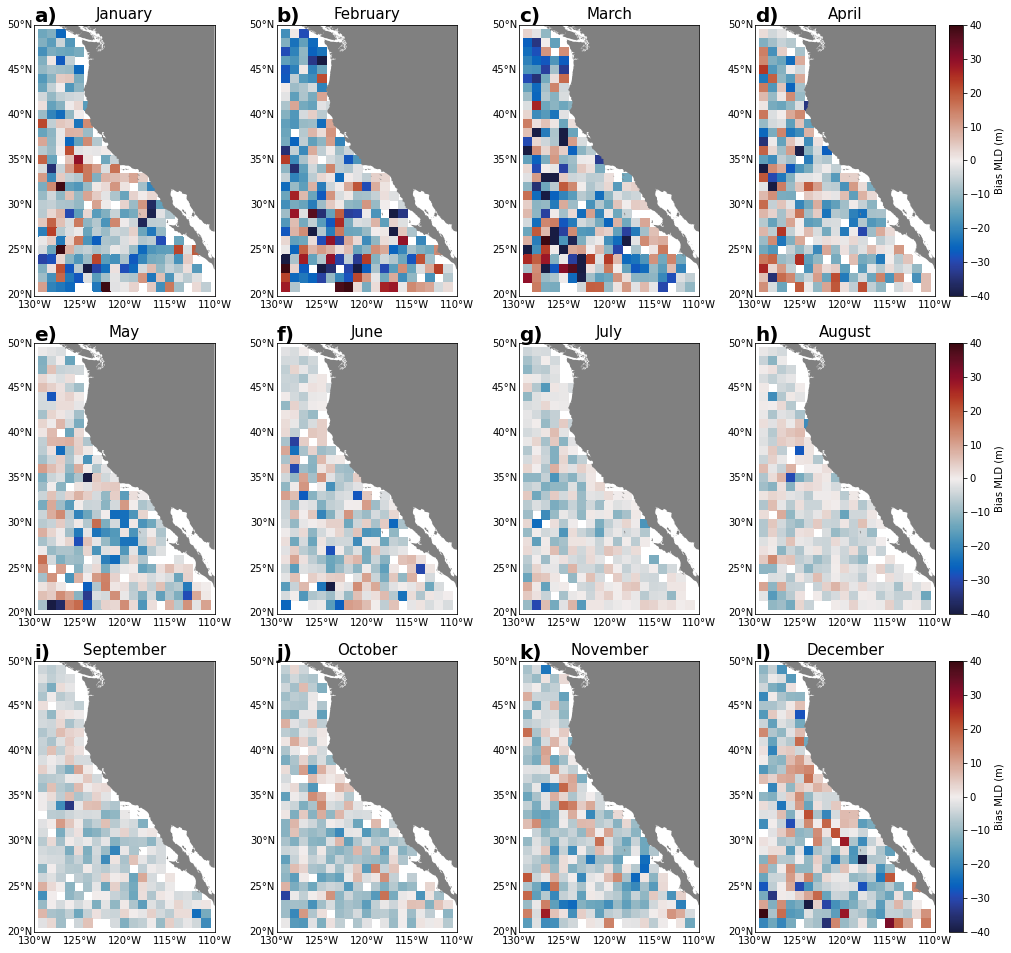

In [57]:
import string
x1= x
y1= list(y);y2=np.array(y1[::-1]);
ticks= np.array([-50,-40,-30,-20,-10,0,10,20,30,40,50]) #labels para el colorbar
bias=10
MODELOS=lista_modelos
ARGO=lista_argos
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-110,urcrnrlat=50, resolution ='h')
  x, y = m(x1, y2)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y2, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-40, vmax=40)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(20,50+1,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-130,-125,-120,-115, -110],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias MLD (m)', rotation=90)

## Diagrama de Taylor

In [68]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=lista_modelos
ARGO=lista_argos
w=0.23;h=0.22
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [69]:
CORRCOEF[2]=CORRCOEF[2]+0.15;CORRCOEF[3]=CORRCOEF[3]+0.25;CORRCOEF[4]=CORRCOEF[4]+0.25;CORRCOEF[5]=CORRCOEF[5]+0.15;CORRCOEF[7]=CORRCOEF[7]+0.15;

In [70]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

,STD,CORR,RMSE,Mes
0,0.694131,0.731193,0.732049,January
1,0.625612,0.662294,0.806670,February
2,0.469720,0.657013,0.933564,March
3,0.478904,0.616380,0.974848,April
4,0.439287,0.704096,0.953462,May
5,0.444222,0.657964,0.939454,June
6,0.472654,0.620936,0.895075,July
7,0.538344,0.698196,0.914633,August
8,0.605176,0.680871,0.862308,September
9,0.613546,0.739354,0.815144,October


In [71]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


Text(1.0, 0.21, 'RMSE')

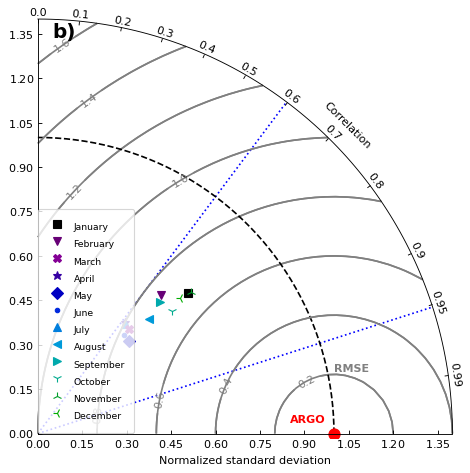

In [73]:
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.4), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=8)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.52**2)],[0,1.52], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.58**2)],[0,0.58], color='blue',linestyle=':') # correlacion 0.95
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.34,'b)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')

# Canarias

## Leer datos crudos

## Datos ARGO

http://mixedlayer.ucsd.edu/

In [2]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/'
argo=xr.open_dataset('Argo_mixedlayers_monthlyclim_04142022.nc')
min_lon = -25;min_lat =15
max_lon = -5;max_lat =45
mask_lon = (argo.lon >= min_lon) & (argo.lon <= max_lon)
mask_lat = (argo.lat >= min_lat) & (argo.lat <= max_lat)
argo=argo.where(mask_lon & mask_lat, drop=True)
argo

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual


<xarray.Dataset>
Dimensions:        (iLAT: 30, iLON: 20, iMONTH: 12)
Dimensions without coordinates: iLAT, iLON, iMONTH
Data variables: (12/20)
    lat            (iLAT, iLON) float64 15.5 15.5 15.5 15.5 ... 44.5 44.5 44.5
    lon            (iLON, iLAT) float64 -24.5 -24.5 -24.5 ... -5.5 -5.5 -5.5
    month          (iMONTH, iLON, iLAT) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
    mld_da_mean    (iLAT, iLON, iMONTH) float64 33.42 nan 26.85 ... 52.29 93.99
    mld_dt_mean    (iLAT, iLON, iMONTH) float64 33.66 nan 27.43 ... 55.49 100.7
    mld_da_median  (iLAT, iLON, iMONTH) float64 31.31 nan 25.85 ... 55.11 104.1
    ...             ...
    mlt_dt         (iLAT, iLON, iMONTH) float64 23.23 nan 22.79 ... 15.91 14.07
    mls_da         (iLAT, iLON, iMONTH) float64 36.29 nan 36.25 ... 35.79 35.84
    mls_dt         (iLAT, iLON, iMONTH) float64 36.3 nan 36.25 ... 35.79 35.84
    num            (iLAT, iLON, iMONTH) float64 4.0 0.0 6.0 ... 11.0 10.0 5.0
    longrid        (iLAT, iLON) float64 -24.5 -23.5 -22.5 ... -7.5 -6.5 -5.5
    latgrid        (iLAT, iLON) float64 15.5 15.5 15.5 15.5 ... 44.5 44.5 44.5
Attributes:
    description:  This file was created using \n matlab R2011b with NETCDF Li...
    date:         [730848.53015047 730848.88790506 730849.28543982 ... 738591...

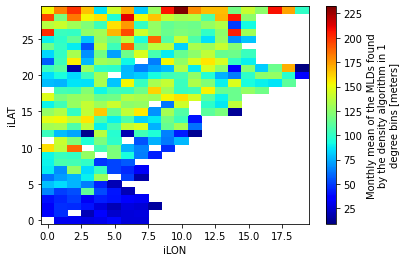

In [3]:
argo['mld_da_mean'].sel(iMONTH=1).plot(cmap='jet')

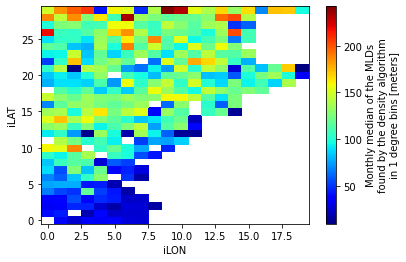

In [4]:
argo['mld_da_median'].sel(iMONTH=1).plot(cmap='jet')

In [5]:
x=np.unique(argo.lon.values)
y=np.unique(argo.lat.values)
y

array([15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5,
       26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5,
       37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5])

## Leer datos Producto reanalisis (2005-2017)

In [6]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/Canarias/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_PHY_MLD.nc')
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/Canarias


<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 121, month: 12)
Coordinates:
  * longitude  (longitude) float32 -25.0 -24.75 -24.5 -24.25 ... -5.5 -5.25 -5.0
  * latitude   (latitude) float32 15.0 15.25 15.5 15.75 ... 44.5 44.75 45.0
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    MLD        (month, latitude, longitude) float32 ...

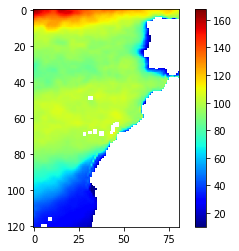

In [7]:
plt.imshow(np.flipud(reanal.sel(month=1).MLD.values), cmap='jet')
plt.colorbar()

## Validacion meses

In [8]:
X_t, Y_t= np.meshgrid(x,y)
lista_modelos=[]
lista_argos=[]
for i, j in zip(range(1,12+1,1),range(0,12,1)):
  grid_z0_1=basemap.interp(datain=np.flipud(reanal.sel(month=i).MLD.values), xin=reanal.sel(month=i).longitude.values, 
                         yin=reanal.sel(month=i).latitude.values, xout=X_t, yout=Y_t, order=1, masked= True)
  lista_modelos.append(grid_z0_1)
  argos=np.flipud(argo['mld_da_median'].sel(iMONTH=j).values)
  lista_argos.append(argos)
print(len(lista_modelos))
print(lista_modelos[0].shape)
print(len(lista_argos))
print(lista_argos[0].shape)

12
(30, 20)
12
(30, 20)


## Grafico de comparacion espacial

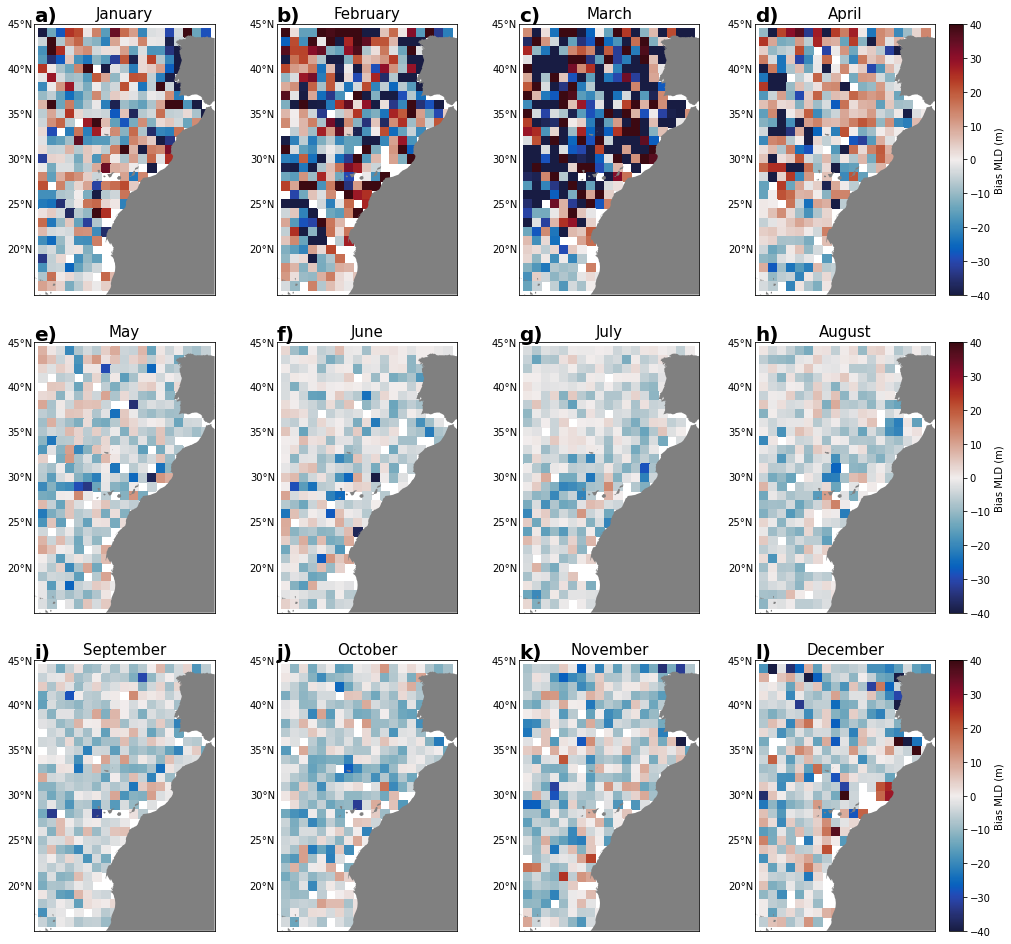

In [81]:
import string
x1= x
y1= list(y);y2=np.array(y1[::-1]);
ticks= np.array([-50,-40,-30,-20,-10,0,10,20,30,40,50]) #labels para el colorbar
bias=10
MODELOS=lista_modelos
ARGO=lista_argos
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=-25,llcrnrlat=15,urcrnrlon=-5,urcrnrlat=45, resolution ='h')
  x, y = m(x1, y2)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y2, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-40, vmax=40)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(20,50+1,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([-130,-125,-120,-115, -110],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias MLD (m)', rotation=90)

## Diagrama de Taylor

In [9]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=lista_modelos
ARGO=lista_argos
w=0.23;h=0.22
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [10]:
CORRCOEF[1]=CORRCOEF[1]+0.05;CORRCOEF[2]=CORRCOEF[2]+0.20;CORRCOEF[3]=CORRCOEF[3]+0.40;
CORRCOEF[4]=CORRCOEF[4]+0.25;CORRCOEF[5]=CORRCOEF[5]+0.15;CORRCOEF[7]=CORRCOEF[7]+0.10;

In [11]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

,STD,CORR,RMSE,Mes
0,0.826234,0.720916,0.711193,January
1,0.798752,0.716574,0.758339,February
2,0.498612,0.722922,0.900803,March
3,0.310853,0.673430,0.989533,April
4,0.357956,0.656842,1.044144,May
5,0.493033,0.642225,0.992148,June
6,0.552404,0.684361,0.901801,July
7,0.511478,0.725881,0.952559,August
8,0.510827,0.547135,1.026064,September
9,0.655913,0.712832,0.886796,October


In [12]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


Text(1.0, 0.21, 'RMSE')

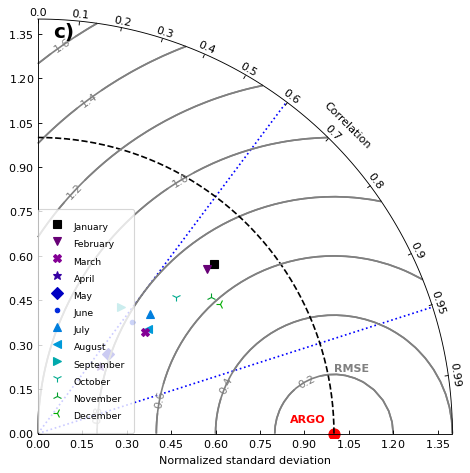

In [13]:
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.4), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=8)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.52**2)],[0,1.52], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.58**2)],[0,0.58], color='blue',linestyle=':') # correlacion 0.95
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.34,'c)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')

# Benguela

## Datos ARGO

http://mixedlayer.ucsd.edu/

In [14]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/'
argo=xr.open_dataset('Argo_mixedlayers_monthlyclim_04142022.nc')
min_lon = 5;min_lat =-40
max_lon = 25;max_lat =-10
mask_lon = (argo.lon >= min_lon) & (argo.lon <= max_lon)
mask_lat = (argo.lat >= min_lat) & (argo.lat <= max_lat)
argo=argo.where(mask_lon & mask_lat, drop=True)
argo

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual


<xarray.Dataset>
Dimensions:        (iLAT: 30, iLON: 20, iMONTH: 12)
Dimensions without coordinates: iLAT, iLON, iMONTH
Data variables: (12/20)
    lat            (iLAT, iLON) float64 -39.5 -39.5 -39.5 ... -10.5 -10.5 -10.5
    lon            (iLON, iLAT) float64 5.5 5.5 5.5 5.5 ... 24.5 24.5 24.5 24.5
    month          (iMONTH, iLON, iLAT) float64 1.0 1.0 1.0 ... 12.0 12.0 12.0
    mld_da_mean    (iLAT, iLON, iMONTH) float64 21.97 36.83 49.44 ... nan nan
    mld_dt_mean    (iLAT, iLON, iMONTH) float64 25.36 37.65 52.5 ... nan nan nan
    mld_da_median  (iLAT, iLON, iMONTH) float64 16.18 37.11 44.29 ... nan nan
    ...             ...
    mlt_dt         (iLAT, iLON, iMONTH) float64 15.59 16.56 16.4 ... nan nan nan
    mls_da         (iLAT, iLON, iMONTH) float64 34.85 34.89 34.93 ... nan nan
    mls_dt         (iLAT, iLON, iMONTH) float64 34.86 34.89 34.93 ... nan nan
    num            (iLAT, iLON, iMONTH) float64 9.0 15.0 11.0 ... 0.0 0.0 0.0
    longrid        (iLAT, iLON) float64 5.5 6.5 7.5 8.5 ... 21.5 22.5 23.5 24.5
    latgrid        (iLAT, iLON) float64 -39.5 -39.5 -39.5 ... -10.5 -10.5 -10.5
Attributes:
    description:  This file was created using \n matlab R2011b with NETCDF Li...
    date:         [730848.53015047 730848.88790506 730849.28543982 ... 738591...

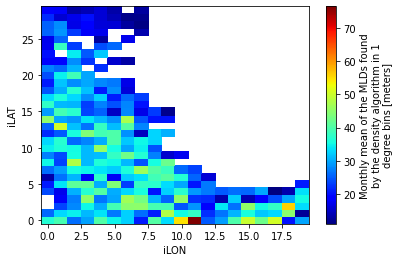

In [15]:
argo['mld_da_mean'].sel(iMONTH=1).plot(cmap='jet')

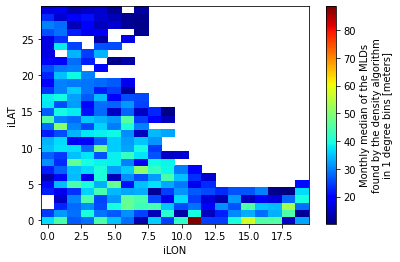

In [16]:
argo['mld_da_median'].sel(iMONTH=1).plot(cmap='jet')

In [17]:
x=np.unique(argo.lon.values)
y=np.unique(argo.lat.values)
y

array([-39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5,
       -30.5, -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5,
       -21.5, -20.5, -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5,
       -12.5, -11.5, -10.5])

## Leer datos Producto reanalisis (2005-2017)

In [18]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/Benguela/'
reanal=xr.open_dataset('GLOBAL_REANALYSIS_PHY_MLD.nc')
reanal

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_VALIDACION_MLD_Mensual/Benguela


<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 121, month: 12)
Coordinates:
  * longitude  (longitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * latitude   (latitude) float32 -40.0 -39.75 -39.5 ... -10.5 -10.25 -10.0
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    MLD        (month, latitude, longitude) float32 ...

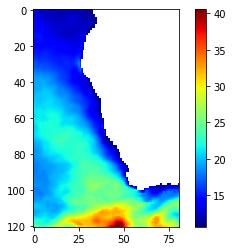

In [19]:
plt.imshow(np.flipud(reanal.sel(month=1).MLD.values), cmap='jet')
plt.colorbar()

## Validacion meses

In [20]:
X_t, Y_t= np.meshgrid(x,y)
lista_modelos=[]
lista_argos=[]
for i, j in zip(range(1,12+1,1),range(0,12,1)):
  grid_z0_1=basemap.interp(datain=np.flipud(reanal.sel(month=i).MLD.values), xin=reanal.sel(month=i).longitude.values, 
                         yin=reanal.sel(month=i).latitude.values, xout=X_t, yout=Y_t, order=1, masked= True)
  lista_modelos.append(grid_z0_1)
  argos=np.flipud(argo['mld_da_median'].sel(iMONTH=j).values)
  lista_argos.append(argos)
print(len(lista_modelos))
print(lista_modelos[0].shape)
print(len(lista_argos))
print(lista_argos[0].shape)

12
(30, 20)
12
(30, 20)


## Grafico de comparacion espacial

In [22]:
!pip install cmocean 
import cmocean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 223 kB 5.4 MB/s 


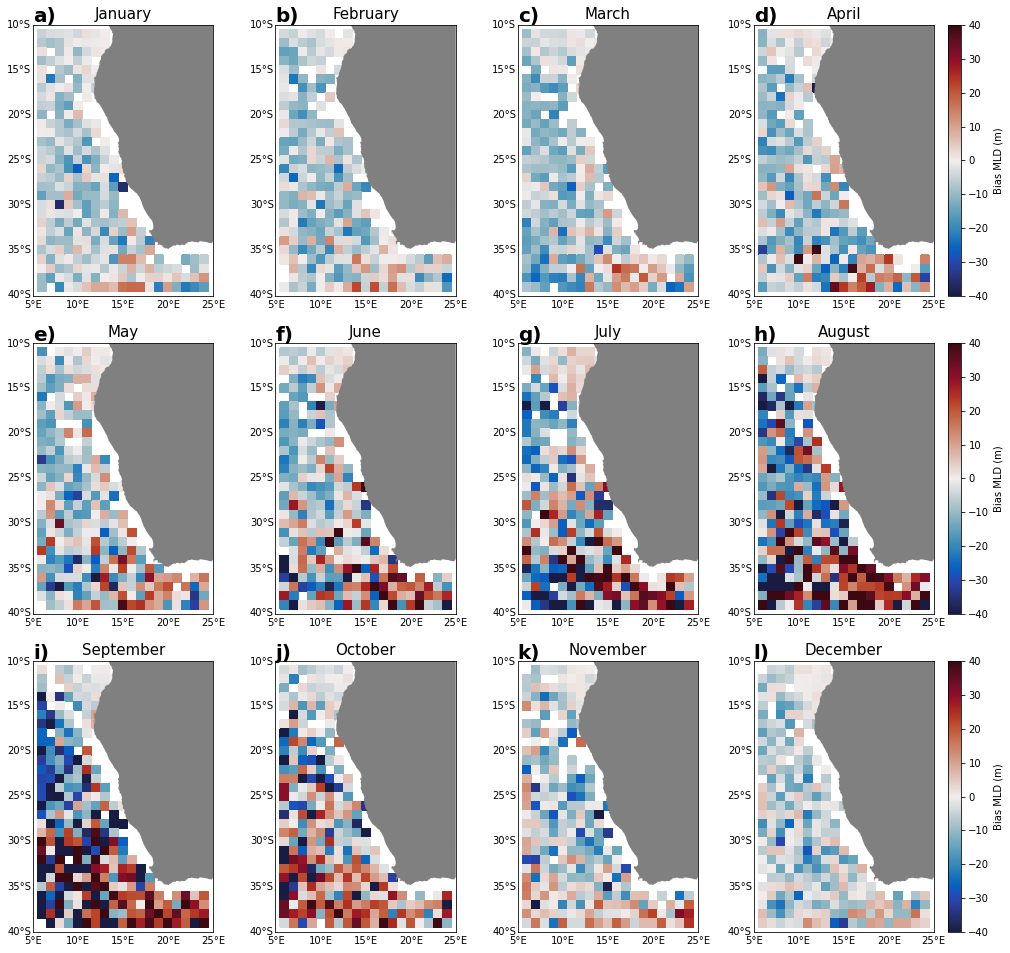

In [24]:
import string
x1= x
y1= list(y);y2=np.array(y1[::-1]);
ticks= np.array([-50,-40,-30,-20,-10,0,10,20,30,40,50]) #labels para el colorbar
bias=10
MODELOS=lista_modelos
ARGO=lista_argos
w=0.23;h=0.17
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
# atributos [left, bottom, width,height] en escala (0,1)
list_o=[[0,0.9,w,h],[0.2,0.9,w,h],[0.4,0.9,w,h],[0.6,0.9,w,h],
        [0,0.70,w,h],[0.2,0.7,w,h],[0.4,0.7,w,h],[0.6,0.7,w,h],
        [0,0.5,w,h],[0.2,0.5,w,h],[0.4,0.5,w,h],[0.6,0.5,w,h],]
fig = plt.figure(figsize=(3.3*5.1,4.7*4.7)) # tamaño de figura
for i,j in zip(list_o,range(12)):
  ax = plt.axes(i)
  ax.text(0.,1.01,string.ascii_lowercase[j]+')',fontsize=20, fontweight = 'bold', transform = ax.transAxes)
  ax.set_title(meses[j], fontsize=15)
  m=Basemap(projection='cyl',llcrnrlon=5,llcrnrlat=-40,urcrnrlon=25,urcrnrlat=-10, resolution ='h')
  x, y = m(x1, y2)
  z= MODELOS[j]-ARGO[j]
  cmap= plt.get_cmap("jet")
  cs=m.pcolormesh(x1, y2, z,cmap=cmocean.cm.balance,shading='flat',latlon=True,vmin=-40, vmax=40)
  m.drawcoastlines(color='white',zorder=0)
  m.fillcontinents(color='grey',lake_color='grey')
  m.drawparallels(np.arange(-40,-10+1,5.),labels=[1,0,0,0],linewidth=0.0)
  m.drawmeridians([5,10,15,20,25],labels=[0,0,0,1],linewidth=0.0)
  if j in [3,7,11]:
    cbar=plt.colorbar(ticks=ticks)
    cbar.set_label('Bias MLD (m)', rotation=90)

## Diagrama de Taylor

In [25]:
STD_m =[]
CORRCOEF = []
RMSE=[]
Meses=['January','February','March','April','May','June','July','August','September','October','November','December']
MARCADORES = ['s', 'v', 'X', '*', 'D','.','^','<','>','1','2','3','4','8','p','P','h','H','d']
COLORES = plt.cm.get_cmap('nipy_spectral', 24)
MODELOS=lista_modelos
ARGO=lista_argos
w=0.23;h=0.22
meses=['January','February','March','April','May','June','July','August','September','October','November','December']
for k in range(1,12+1,1):
  # Extraccion de datos de modelo y satelite
  modelo= MODELOS[k-1]# aplicar media en dimension tiempo
  satelite= ARGO[k-1] # aplicar media en dimension tiempo
  # Sacar los indices que comparten en el espacio
  IND = np.invert(np.isnan(satelite) | np.isnan(modelo))
  P = modelo[IND] # Modelo
  A = satelite[IND] # Referencia Era
  DD = np.ma.std(A.ravel()) # Desviacion estandar Referencia
  P = P/DD # Normalizacion por Std referencia
  A = A/DD 
  STD_m.append(np.ma.std(P.ravel()))
  CORRCOEF.append(np.ma.corrcoef(P.ravel(), A.ravel()).data[0,1])
  RMSE.append(np.sqrt(np.mean((P-A)**2)))

In [27]:
CORRCOEF[0]=CORRCOEF[0]+0.25;CORRCOEF[1]=CORRCOEF[1]+0.2;CORRCOEF[7]=CORRCOEF[7]+0.10;
CORRCOEF[8]=CORRCOEF[8]+0.20;CORRCOEF[9]=CORRCOEF[9]+0.40;CORRCOEF[10]=CORRCOEF[10]+0.25
CORRCOEF[11]=CORRCOEF[11]+0.20

In [28]:
dfr=pd.DataFrame({'STD':STD_m,'CORR':CORRCOEF,'RMSE':RMSE,'Mes':Meses})
dfr

,STD,CORR,RMSE,Mes
0,0.563110,0.676811,1.035469,January
1,0.572244,0.697284,1.006710,February
2,0.691054,0.695954,0.855702,March
3,0.746724,0.706041,0.741494,April
4,0.778141,0.783504,0.637845,May
5,0.817876,0.761798,0.652070,June
6,0.746185,0.719991,0.695339,July
7,0.691166,0.722973,0.785246,August
8,0.610323,0.691402,0.883713,September
9,0.590062,0.699596,0.997380,October


In [29]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/'
from taylorDiagram_mod import TaylorDiagram as TaDiM

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM


Text(1.0, 0.21, 'RMSE')

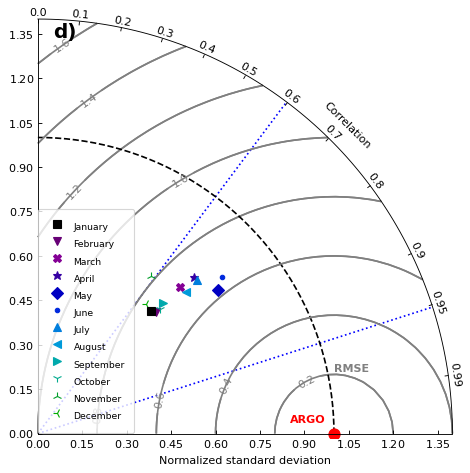

In [30]:
import numpy as NP
figID_Taylor = plt.figure(num=11, dpi=80)
figID_Taylor.set_size_inches(7., 7.)
TayDia = TaDiM(1, fig=figID_Taylor, rect=111, srange=(0., 1.4), label='ARGO')
pp=[]
for i in range(11+1):
  ttt=TayDia.add_sample(STD_m[i], CORRCOEF[i], marker=MARCADORES[i%len(MARCADORES)], linestyle='None', color=COLORES(i), ms=8)#, ax=axs.ravel()[i])
  pp.append(ttt)
contours = TayDia.add_contours(levels=10, colors='0.5')
contours = TayDia.add_contours(levels=10, colors='0.5')
plt.plot([0,NP.sqrt(1.9**2 -1.52**2)],[0,1.52], color='blue',linestyle=':') # correlacion 0.75
plt.plot([0,NP.sqrt(1.9**2 -0.58**2)],[0,0.58], color='blue',linestyle=':') # correlacion 0.95
TayDia.ax.clabel(contours, inline=1, fontsize=10, fmt='%.1f')
plt.legend(pp, Meses,  prop=dict(size='small'), loc='lower left', borderpad=1.0, ncol=1,handleheight=2.4, labelspacing=0.05) # numpoints=1,
plt.text(0.85,0.04,'ARGO', color='red',weight='bold')
#plt.text(0.85,0.35,'MMM', color='red',weight='bold')
plt.text(0.05,1.34,'d)', color='black',weight='bold', fontsize=18)
plt.text(1.00,0.21,'RMSE', color='gray',weight='bold')